# Imports and initializations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [3]:
# add our custom modules to the python import path
import sys
import os
sys.path.append(os.getcwd() + '/../Client_modules/')

import mResSweepDouble
from socProxy import makeProxy
import h5py
from PythonDrivers.control_atten import setatten
# import PythonDrivers.YOKOGS200 as YOKOGS200
import matplotlib.pyplot as plt
savePath = r'Z:\t1Team\Data\2024-02-29_BFG_cooldown\2024-02-25_TAHP02_Au+144nm'
import numpy as np

# Python 3.7
# os.environ['PATH'] = os.getcwd() + '\\PythonDrivers' + os.pathsep + os.environ['PATH']
# Python 3.8 and newer
os.add_dll_directory(os.getcwd() + '/../Client_modules/PythonDrivers')

from contextlib import contextmanager,redirect_stderr,redirect_stdout
from os import devnull

Could not import QickSoc: No module named 'pynq'


In [4]:
# create proxy to ZCU216 board
soc, soccfg = makeProxy('192.168.1.11')
print(soccfg)

Pyro.NameServer PYRO:Pyro.NameServer@192.168.1.11:8888
myqick PYRO:obj_fdaf141806dd44899a0828b39cc7c0c0@192.168.1.11:43097

QICK configuration:

	Board: ZCU216

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	7 signal generator channels:
	0:	axis_signal_gen_v4 - tProc output 1, envelope memory 65536 samples
		DAC tile 2, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	1:	axis_signal_gen_v4 - tProc output 2, envelope memory 65536 samples
		DAC tile 2, ch 1, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	2:	axis_signal_gen_v4 - tProc output 3, envelope memory 65536 samples
		DAC tile 2, ch 2, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	3:	axis_signal_gen_v4 - tProc output 4, envelope memory 65536 samples
		DAC tile 2, ch 3, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	4:	axis_signal_gen_v4 - tProc output 5, envelope memory 65536 samples
		DAC tile 3, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	5:	axis_signal_gen_v4 - tProc output 6, envelope 

# Wide Sweep

In [ ]:
attobj = CLI_Vaunix_Attn()
# attobj.get_channels_number(1)
# attobj.get_serial_number(1)
# attobj.set_attenuation(1,0,1)
attobj.set_attenuation(1,0,2)
# attobj.set_attenuation(1,0,3)
# attobj.set_attenuation(1,0,4)

In [28]:
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [1500,1500]


# center freqs
inputDict['res_f']=[6250,7750]

# define numbers of points
inputDict['n_expts'] = 1500*1000  # number of points along the frequency axis
inputDict['n_rounds'] = 1  # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 500  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
inputDict['basePower'] = -40 # dBm
inputDict['gain'] = [30000,30000]


# Acquire
inputDict['power'] = inputDict['basePower']
Instancex = mResSweepDouble.ResSweep(path=savePath, prefix='wide_sweep_', inputDict=inputDict, soc=soc, soccfg=soccfg)
with open(devnull,'w') as f:
    with redirect_stderr(f):
        datax = mResSweepDouble.ResSweep.acquire(Instancex)
# mResSweep.ResSweep.save_data(Instancex, datax)
mResSweepDouble.ResSweep.display(Instancex, datax, fit=False)

Frequencies out are: [6250, 7750] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 17136.250 s


NameError: name 'mResSweep' is not defined

Saving wide_sweep_-2024-03-08-17-32-24


<IPython.core.display.Javascript object>


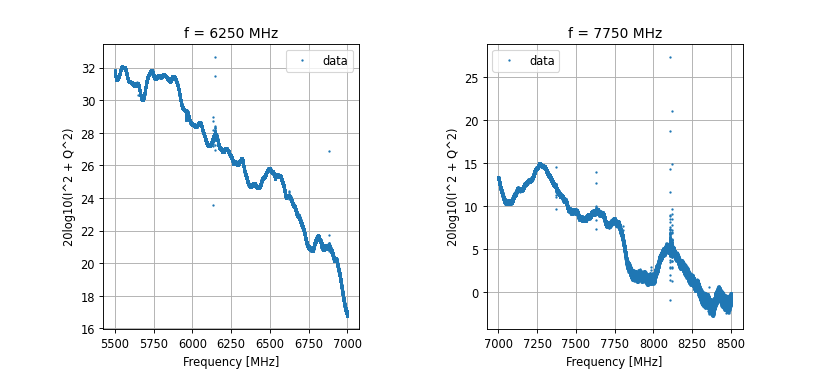

([[], []], [[], []])

In [29]:
mResSweepDouble.ResSweep.save_data(Instancex, datax)

mResSweepDouble.ResSweep.display(Instancex, datax, fit=False)

In [7]:
attobj = CLI_Vaunix_Attn()
# attobj.get_channels_number(1)
# attobj.get_serial_number(1)
# attobj.set_attenuation(1,10,1)
attobj.set_attenuation(1,0,2)
# attobj.set_attenuation(1,0,3)
# attobj.set_attenuation(1,0,4)

True

# Zoom in on resonator

## Res 1,2

Frequencies out are: [8008.629, 6829.28] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 24.744 s


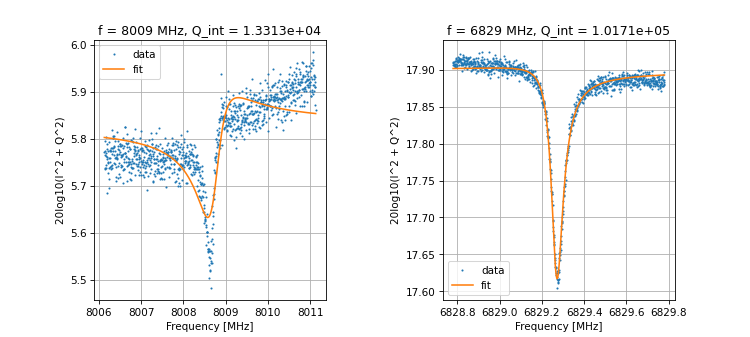

([array([8.00874475e+09, 1.33134069e+04, 8.30662934e+05, 4.69736033e+04,
         5.82938096e+00]),
  array([ 6.82926826e+09,  1.01711820e+05,  3.12949738e+06, -1.61913484e+03,
          1.78986813e+01])],
 [array([[ 1.74937411e+08,  7.00470075e+05,  5.50844373e+08,
           8.60870461e+06, -1.39769012e+01],
         [ 7.00470075e+05,  3.14729946e+05,  1.60651786e+07,
          -6.12393626e+05, -4.28194966e-01],
         [ 5.50844373e+08,  1.60651786e+07,  3.52970646e+09,
          -2.69145730e+06, -9.49684584e+01],
         [ 8.60870461e+06, -6.12393626e+05, -2.69145730e+06,
           2.98767703e+06,  1.43753021e-01],
         [-1.39769012e+01, -4.28194966e-01, -9.49684584e+01,
           1.43753021e-01,  4.63357620e-06]]),
  array([[ 6.35914858e+04, -3.58313160e+03, -9.01876963e+05,
           6.93982141e+03,  7.16489634e-03],
         [-3.58313160e+03,  6.30800710e+05,  1.17727391e+07,
           5.09370984e+03, -9.95227238e-02],
         [-9.01876963e+05,  1.17727391e+07,  3.888

In [14]:
#RFSoC 10

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [5,1]

# center freqs

inputDict['res_f']=[8008.629,6829.28]
inputDict['names']=['6p54','6p83']

# define numbers of points
inputDict['n_expts'] = 1000  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['basePowers'] = 0 # dBm
inputDict['gain'] = [30000, 30000]

# acquire data
# Acquire
inputDict['power'] = inputDict['basePowers']

Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='finding_res', inputDict=inputDict, soc=soc, soccfg=soccfg)

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)

In [ ]:
# acquire data
# Acquire
inputDict['power'] = inputDict['basePower']
Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='data', inputDict=inputDict, soc=soc, soccfg=soccfg)
data2 = mResSweepDouble.ResSweep.acquire(Instance2)
# mResSweep.ResSweep.save_data(Instance, data)

In [ ]:
# display results
mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)


## Res 3,4

In [ ]:
# define sweep params


inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [.05, .05]

# center freqs

inputDict['res_f']=[6530.407, 6824.19]

# define numbers of points
inputDict['n_expts'] = 1000  # number of points along the frequency axis
inputDict['n_rounds'] = 5  # number of times to sweep along the frequency axis
inputDict['n_reps'] = 5  # number of repetitions to take at each frequency point
# inputDict['n_reps'] = 1

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 200  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
inputDict['basePower'] = -40 # dBm
inputDict['gain'] = [25000, 25000]


In [ ]:
# acquire data
# Acquire
inputDict['power'] = inputDict['basePower']
Instance3 = mResSweepDouble.ResSweep(path=savePath, prefix='data', inputDict=inputDict, soc=soc, soccfg=soccfg)
data3 = mResSweepDouble.ResSweep.acquire(Instance3)
# mResSweep.ResSweep.save_data(Instance, data)

In [ ]:
# display results

# left one is gone, but right remains, maybe is due to round to round noise?
mResSweepDouble.ResSweep.display(Instance3, data3, fit=True)
print(Instance2.data['data']['power'])

## Res 5,6

In [ ]:
# define sweep params


inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [.05, .04]

# center freqs

inputDict['res_f']=[7209.82, 7384.674]

# define numbers of points
inputDict['n_expts'] = 300  # number of points along the frequency axis
inputDict['n_rounds'] = 5 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 50  # number of repetitions to take at each frequency point
# inputDict['n_reps'] = 1

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 100  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
inputDict['basePower'] = -40 # dBm
inputDict['gain'] = [20000, 20000]


In [ ]:
# acquire data
# Acquire
inputDict['power'] = inputDict['basePower']
Instance3 = mResSweepDouble.ResSweep(path=savePath, prefix='data', inputDict=inputDict, soc=soc, soccfg=soccfg)
data3 = mResSweepDouble.ResSweep.acquire(Instance3)
# mResSweep.ResSweep.save_data(Instance, data)

In [ ]:
# display results

# left one is gone, but right remains, maybe is due to round to round noise?
mResSweepDouble.ResSweep.display(Instance3, data3, fit=True)
print(Instance3.data['data']['power'])

In [ ]:
# testing for FFS code


In [ ]:
pOpt,pCov = mResSweepDouble.ResSweep.display(Instance3, data3, fit=True)

In [ ]:
print(pOpt[0])
# print(pCov)

In [ ]:
pOpt[0][0]*((1/pOpt[0][1])+(1/pOpt[0][2]))/1e6

## Res 7,8

In [ ]:
# define sweep params


inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [.1, .05]

# center freqs
# inputDict['res_f']=[7995.55, 7995.55]

inputDict['res_f']=[7694.999, 7995.55]

# define numbers of points
inputDict['n_expts'] = 300  # number of points along the frequency axis
inputDict['n_rounds'] = 5  # number of times to sweep along the frequency axis
inputDict['n_reps'] = 50  # number of repetitions to take at each frequency point
# inputDict['n_reps'] = 1

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 100  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
inputDict['basePower'] = -40 # dBm
inputDict['gain'] = [20000, 20000]


In [ ]:
# acquire data
# Acquire
inputDict['power'] = inputDict['basePower']
Instance3 = mResSweepDouble.ResSweep(path='Z:t1Team\\Data\\2023-04-04_TAHP02_AuPd_wet-etch\\freq_shift_rfsoc', 
                                     prefix='data', inputDict=inputDict, soc=soc, soccfg=soccfg)
data3 = mResSweepDouble.ResSweep.acquire(Instance3)
mResSweepDouble.ResSweep.save_data(Instance3, data3)

In [ ]:
# display results

# left one is gone, but right remains, maybe is due to round to round noise?
mResSweepDouble.ResSweep.display(Instance3, data3, fit=True)
print(Instance3.data['data']['power'])

In [ ]:
pOpt,pCov= mResSweepDouble.ResSweep.display(Instance3, data3, fit=True)
print(pOpt)

In [ ]:
Q_t=1/((1/6.18288913e+05)+(1/5.24841843e+07))
(7.69499852e+09/Q_t)/1e6

In [ ]:
Q_t=1/((1/5.34577254e+06)+1/(1.72613670e+06))
(7.99554979e+09/Q_t)/1e6

In [ ]:
# have not found resonators 4,5: ~[6826,7231]
# search below:



# res 4,5 search

In [ ]:
# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [120, 120]

# center freqs

inputDict['res_f']=[6826, 7231]

# define numbers of points
inputDict['n_expts'] = 120*1000  # number of points along the frequency axis
inputDict['n_rounds'] = 6  # number of times to sweep along the frequency axis
inputDict['n_reps'] = 5  # number of repetitions to take at each frequency point
# inputDict['n_reps'] = 1

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 200  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
inputDict['basePower'] = -40 # dBm
inputDict['gain'] = [30000, 30000]

inputDict['power'] = inputDict['basePower']
Instance5 = mResSweepDouble.ResSweep(path=savePath, prefix='data', inputDict=inputDict, soc=soc, soccfg=soccfg)
data5 = mResSweepDouble.ResSweep.acquire(Instance5)

mResSweepDouble.ResSweep.display(Instance5, data5, fit=False)

# res 7 search

# Decimated measurement

In [ ]:
# Acquire
inputDict['power'] = inputDict['basePower']
inputDict['adc_trig_offset'] = 1
Instance = mResSweepDouble.ResSweep(path=savePath, prefix='data', inputDict=inputDict, soc=soc, soccfg=soccfg)
data = mResSweepDouble.ResSweep.acquire_decimated(Instance, readout_length=1000)
mResSweepDouble.ResSweep.display_decimated(Instance, data)

In [ ]:
Instance.data['data']['iq_list']